# EPL Dataset - Exploratory Data Analysis (EDA)

This notebook explores the English Premier League (EPL) dataset to uncover insights for potential business and sports analytics applications.  
We'll answer stakeholder-driven questions using visualizations and statistics.


### 🎯 Key Business Questions

1. **Which teams tend to dominate at home vs. away?**  
   *Understand home vs. away performance bias to support predictive modeling and strategic planning.*

2. **Is there a trend in the number of goals scored over different seasons?**  
   *Evaluate whether the league is becoming more offensive or defensive over time.*

3. **Are there any strong correlations between match stats and match outcomes?**  
   *Identify predictive relationships between variables like shots, corners, and results.*

4. **Which teams are most aggressive or disciplined?**  
   *Use yellow/red card data to uncover patterns in team discipline or aggression.*

5. **How Reliable Is a Halftime Lead?**  
   *Explore whether early leads translate to final wins.*

## Import Libraries and Load Data

In [6]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# 2. Load Dataset
df = pd.read_csv("../data/processed/epl_final.csv")

# 3. Preview Data
df.head(5)

,Season,MatchDate,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,...,HomeShotsOnTarget,AwayShotsOnTarget,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
0,2000/01,2000-08-19,Charlton,Man City,4,0,H,2,0,H,...,14,4,6,6,13,12,1,2,0,0
1,2000/01,2000-08-19,Chelsea,West Ham,4,2,H,1,0,H,...,10,5,7,7,19,14,1,2,0,0
2,2000/01,2000-08-19,Coventry,Middlesbrough,1,3,A,1,1,D,...,3,9,8,4,15,21,5,3,1,0
3,2000/01,2000-08-19,Derby,Southampton,2,2,D,1,2,A,...,4,6,5,8,11,13,1,1,0,0
4,2000/01,2000-08-19,Leeds,Everton,2,0,H,2,0,H,...,8,6,6,4,21,20,1,3,0,0


## Question 1: Which teams tend to dominate at home vs. away?

Understanding how teams perform at home versus away is critical for predicting match outcomes and evaluating strategic strengths.  
This analysis compares **win counts** and **goal averages** for each team when playing at home and away, and highlights those with a strong home advantage.

In [ ]:
df_copy = df.copy()

# Add result indicators
df_copy["HomeWin"] = df_copy["FullTimeResult"] == "H"
df_copy["AwayWin"] = df_copy["FullTimeResult"] == "A"
df_copy["Draw"] = df_copy["FullTimeResult"] == "D"

# Group by team
home_stats = df_copy.groupby("HomeTeam")[["HomeWin", "Draw"]].sum()
away_stats = df_copy.groupby("AwayTeam")[["AwayWin", "Draw"]].sum()

# Rename columns
home_stats.columns = ["HomeWins", "HomeDraws"]
away_stats.columns = ["AwayWins", "AwayDraws"]

# Combine into one DataFrame
team_performance = pd.concat([home_stats, away_stats], axis=1).fillna(0)

# Sort by home wins for display
team_performance.sort_values("HomeWins", ascending=False).head(10)

,HomeWins,HomeDraws,AwayWins,AwayDraws
Man United,318,82,234,115
Arsenal,314,97,220,119
Liverpool,307,110,223,113
Chelsea,299,110,234,105
Man City,293,72,207,98
Tottenham,275,89,165,117
Everton,223,119,125,142
Newcastle,204,105,111,107
West Ham,170,105,102,103
Aston Villa,165,119,114,112


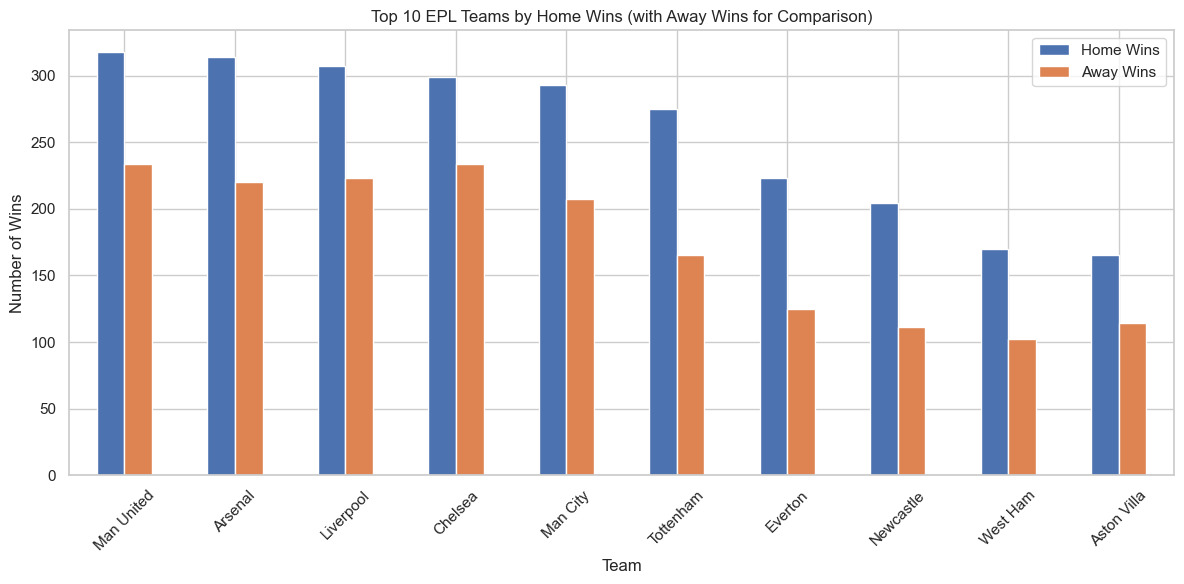

In [17]:
# Top 10 teams by Home Wins
top_10_by_home_wins = team_performance.sort_values("HomeWins", ascending=False).head(10)

# Plot Home vs. Away Wins for those teams
top_10_by_home_wins[["HomeWins", "AwayWins"]].plot(kind="bar", figsize=(12,6))
plt.title("Top 10 EPL Teams by Home Wins (with Away Wins for Comparison)")
plt.ylabel("Number of Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.legend(["Home Wins", "Away Wins"])
plt.tight_layout()
plt.show()

In [8]:
# Average goals scored at home and away by each team
home_goals = df_copy.groupby("HomeTeam")["FullTimeHomeGoals"].mean().rename("AvgHomeGoals")
away_goals = df_copy.groupby("AwayTeam")["FullTimeAwayGoals"].mean().rename("AvgAwayGoals")

# Combine
avg_goals = pd.concat([home_goals, away_goals], axis=1).fillna(0)

# Sort by AvgHomeGoals
avg_goals_sorted = avg_goals.sort_values("AvgHomeGoals", ascending=False)
avg_goals_sorted.head(10)

,AvgHomeGoals,AvgAwayGoals
Man City,2.186667,1.633333
Arsenal,2.147436,1.648188
Liverpool,2.081370,1.645435
Chelsea,2.057569,1.572650
Man United,2.040512,1.592751
Tottenham,1.835821,1.407249
Brentford,1.653333,1.351351
Blackpool,1.578947,1.315789
Newcastle,1.565116,1.111369
Everton,1.511677,1.049251


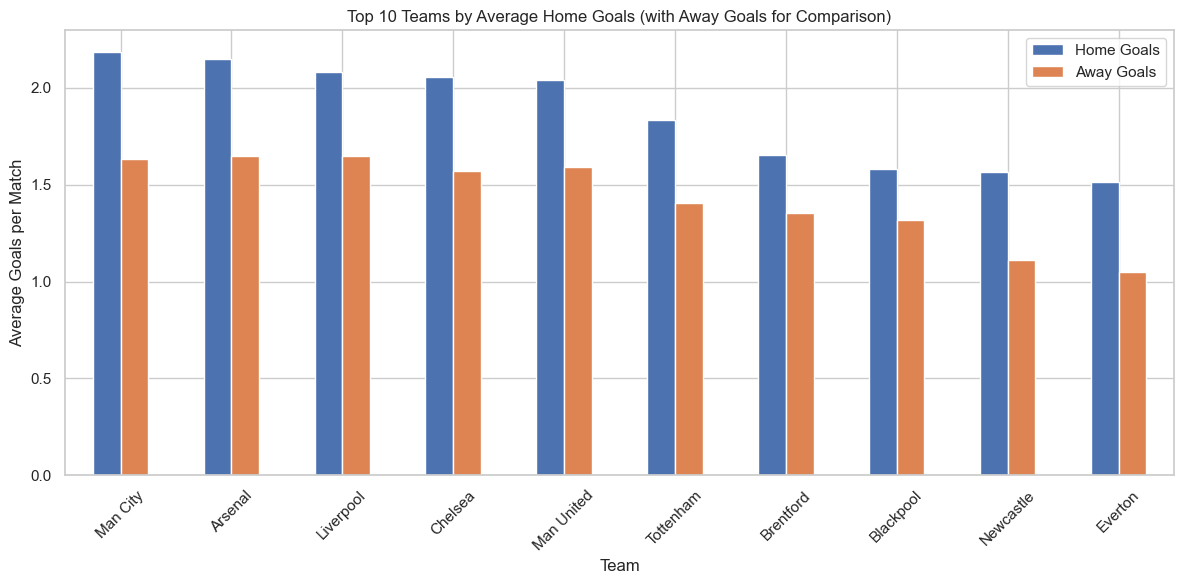

In [14]:
# Top 10 teams by average home goals
top_10_avg_goals = avg_goals.sort_values("AvgHomeGoals", ascending=False).head(10)

# Plot
top_10_avg_goals.plot(kind="bar", figsize=(12,6))
plt.title("Top 10 Teams by Average Home Goals (with Away Goals for Comparison)")
plt.ylabel("Average Goals per Match")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.legend(["Home Goals", "Away Goals"])
plt.tight_layout()
plt.show()

### ✅ Key Findings

- The most dominant teams at home — **Manchester United, Arsenal, Liverpool, Chelsea, and Manchester City** — top both **home wins** and **average home goals**.
- Across the entire league, **teams win and score significantly more at home** than away.
- This insight supports the common belief in "home field advantage" and is useful for **match prediction models**, **betting strategies**, and **performance analysis**.

📌 **Overall Insight:** Home venue provides a substantial advantage in the EPL, both in terms of winning likelihood and goal output — especially for top clubs.

## Question 2: Are Goal Totals Changing Across Seasons?

This analysis explores the **trend of goals scored over different seasons** to determine whether matches have become more offensive or defensive over time.

We'll look at:
- Average goals per match per season
- Total goals per season

In [20]:
df_copy["Season"] = df_copy["Season"].astype(str)

# Group by season and calculate separately
season_goals = df_copy.groupby("Season").agg(
    HomeGoals=("FullTimeHomeGoals", "sum"),
    AwayGoals=("FullTimeAwayGoals", "sum"),
    MatchCount=("Season", "count")
)

# Total and average
season_goals["TotalGoals"] = season_goals["HomeGoals"] + season_goals["AwayGoals"]
season_goals["AvgGoalsPerMatch"] = season_goals["TotalGoals"] / season_goals["MatchCount"]

# Sort by season index
season_goals = season_goals.sort_index()

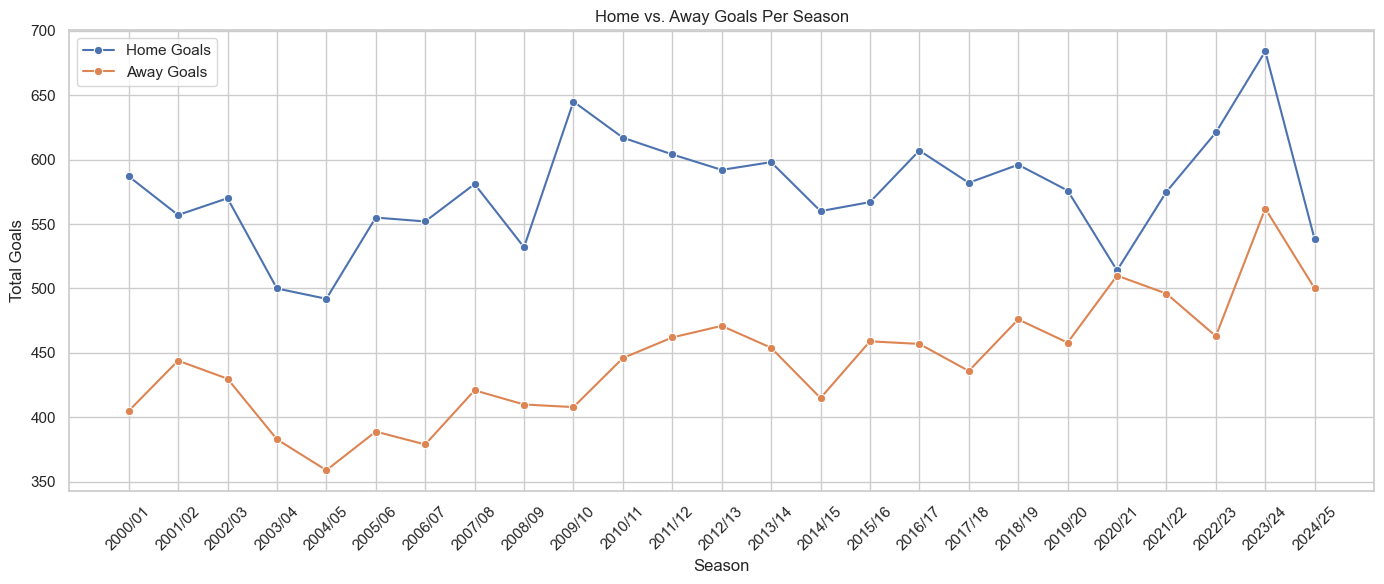

In [21]:
# Plot home and away goals over seasons
plt.figure(figsize=(14,6))
sns.lineplot(data=season_goals, x=season_goals.index, y="HomeGoals", marker='o', label="Home Goals")
sns.lineplot(data=season_goals, x=season_goals.index, y="AwayGoals", marker='o', label="Away Goals")
plt.title("Home vs. Away Goals Per Season")
plt.ylabel("Total Goals")
plt.xlabel("Season")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

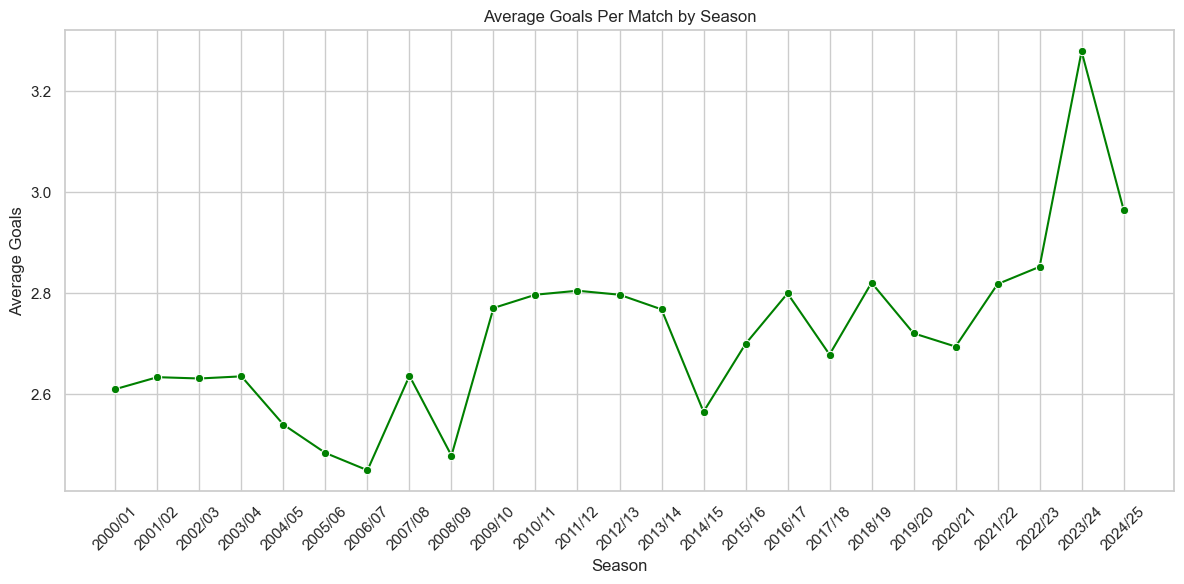

In [22]:
# Line chart for average goals per match per season
plt.figure(figsize=(12,6))
sns.lineplot(data=season_goals, x=season_goals.index, y="AvgGoalsPerMatch", marker='o', color='green')
plt.title("Average Goals Per Match by Season")
plt.ylabel("Average Goals")
plt.xlabel("Season")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### ✅ Key Findings: Goal Trends Across Seasons

- **Home Goals:** The total number of goals scored at home has remained relatively **flat** across seasons, but with **high variance**, fluctuating between 500 and 700 goals. This suggests home scoring is influenced by other situational factors (e.g., team quality, crowd restrictions).

- **Away Goals:** There is a **clear upward trend** in away goals over the seasons, albeit with some noise. This could reflect evolving tactics such as counter-attacking styles or improved away performance.

- **Average Goals per Match:** There's an overall **increasing trend** in goals per match, showing that the league has become more attacking over time.  
  - A noticeable **spike in the 2023–24 season** was observed, followed by a small decline — yet it still remains higher than previous years.

📌 **Insight:** EPL matches are becoming more entertaining and goal-heavy, especially due to rising away performances. This may influence tactical planning, broadcasting focus, and fan engagement strategies.

## Question 3: Which Match Stats Are Most Related to Results?

This analysis explores whether certain match stats — such as **shots, shots on target, corners, or fouls** — have strong relationships with whether a team **wins, loses, or draws**.

We’ll start by computing correlations between numeric features and use a heatmap to visualize them.

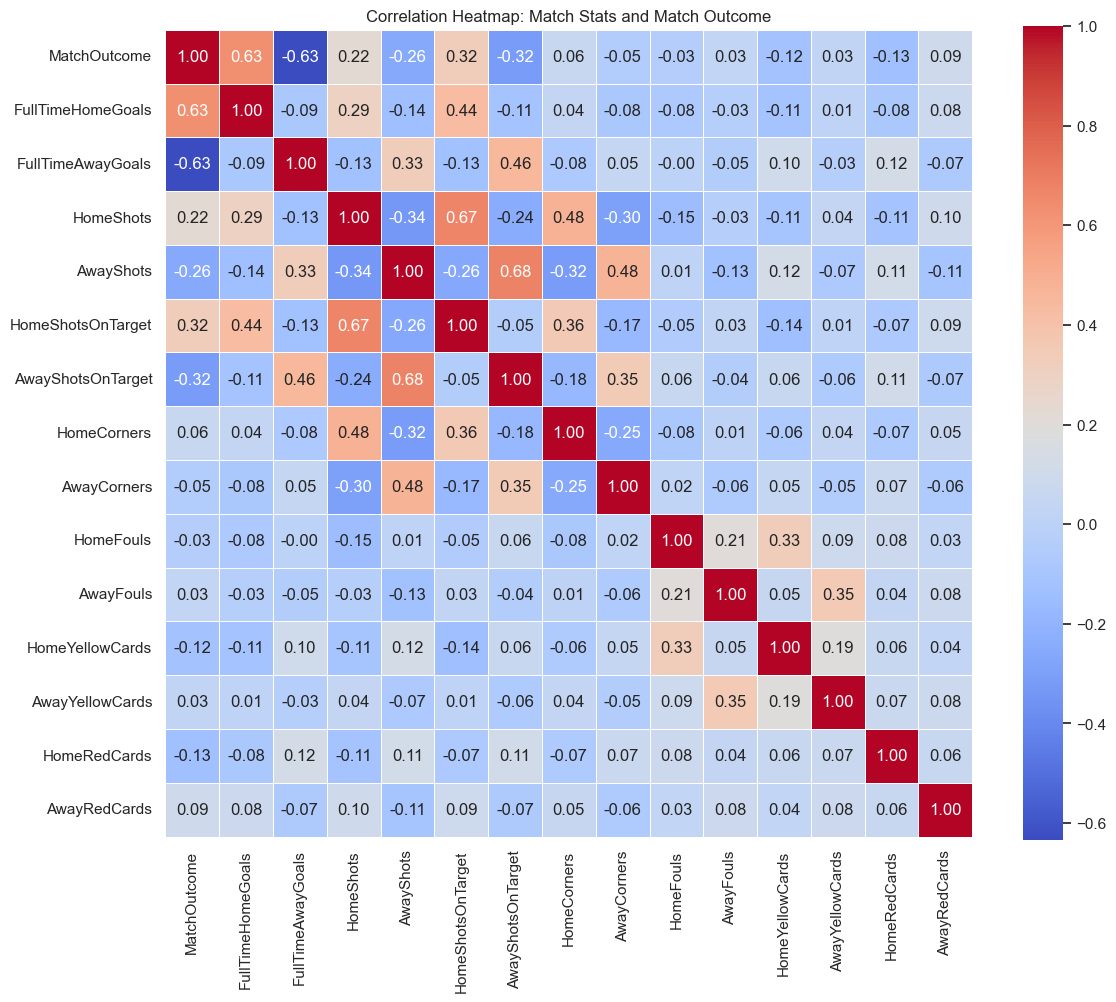

In [27]:
# Include MatchOutcome in a broader correlation grid
focus_cols = [
    "MatchOutcome",
    "FullTimeHomeGoals", "FullTimeAwayGoals",
    "HomeShots", "AwayShots",
    "HomeShotsOnTarget", "AwayShotsOnTarget",
    "HomeCorners", "AwayCorners",
    "HomeFouls", "AwayFouls",
    "HomeYellowCards", "AwayYellowCards",
    "HomeRedCards", "AwayRedCards"
]

# Compute correlation matrix
corr_subset = df_copy[focus_cols].corr()

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_subset, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True)
plt.title("Correlation Heatmap: Match Stats and Match Outcome")
plt.tight_layout()
plt.show()

### ✅ Key Findings: What Match Stats Influence Outcomes?

- As expected, **home goals** correlate positively (**+0.63**) with home wins, and **away goals** negatively (**–0.63**) — we’ll focus on other meaningful stats:

- **Top non-goal stats with strong correlations:**
  - `HomeShotsOnTarget` (**+0.32**) and `HomeShots` (**+0.22**) are positively linked with winning — showing that offensive pressure and shot quality matter.
  - `AwayShotsOnTarget` (**–0.32**) and `AwayShots` (**–0.26**) reduce the home team’s chance of winning — indicating vulnerability to opponent attack is critical.

- **Moderately correlated variables:**
  - `HomeCorners` (**+0.06**) and `AwayCorners` (**–0.05**) show weak directional influence — they may reflect pressure but don’t decisively impact the result.

- **Weakest correlations (near zero):**
  - **Fouls**, **yellow cards**, and **red cards** (both home and away) all fall between –0.13 and +0.09.
  - This suggests that **discipline-related stats do not significantly impact match outcomes** on their own.

📌 **Insight:** Besides goals, the clearest signals of match outcome are in **shots on target** — an efficient attack (or poor defense) shows up in the scoreline.  
Other stats like corners, fouls, and cards may add context, but don’t strongly predict wins or losses.

## Question 4: Which Teams Are Most Aggressive or Disciplined?

This analysis compares EPL teams based on the number of **fouls**, **yellow cards**, and **red cards** received — both at home and away.

We’ll calculate total disciplinary stats per team to identify:
- The most aggressive teams overall
- The most disciplined ones

In [28]:
# Aggregate fouls and cards committed by each team (home + away)
discipline_stats = pd.DataFrame()

discipline_stats["Fouls"] = df_copy.groupby("HomeTeam")["HomeFouls"].sum() + df_copy.groupby("AwayTeam")["AwayFouls"].sum()
discipline_stats["YellowCards"] = df_copy.groupby("HomeTeam")["HomeYellowCards"].sum() + df_copy.groupby("AwayTeam")["AwayYellowCards"].sum()
discipline_stats["RedCards"] = df_copy.groupby("HomeTeam")["HomeRedCards"].sum() + df_copy.groupby("AwayTeam")["AwayRedCards"].sum()

# Sort by total yellow cards
discipline_stats = discipline_stats.sort_values("YellowCards", ascending=False)
discipline_stats.head(10)

,Fouls,YellowCards,RedCards
HomeTeam,,,
Chelsea,10410,1577,68
Man United,10475,1527,54
Everton,11159,1514,79
Tottenham,10495,1485,65
Arsenal,10128,1456,81
Aston Villa,10026,1434,53
West Ham,9316,1403,59
Newcastle,9916,1389,74
Man City,9645,1363,67


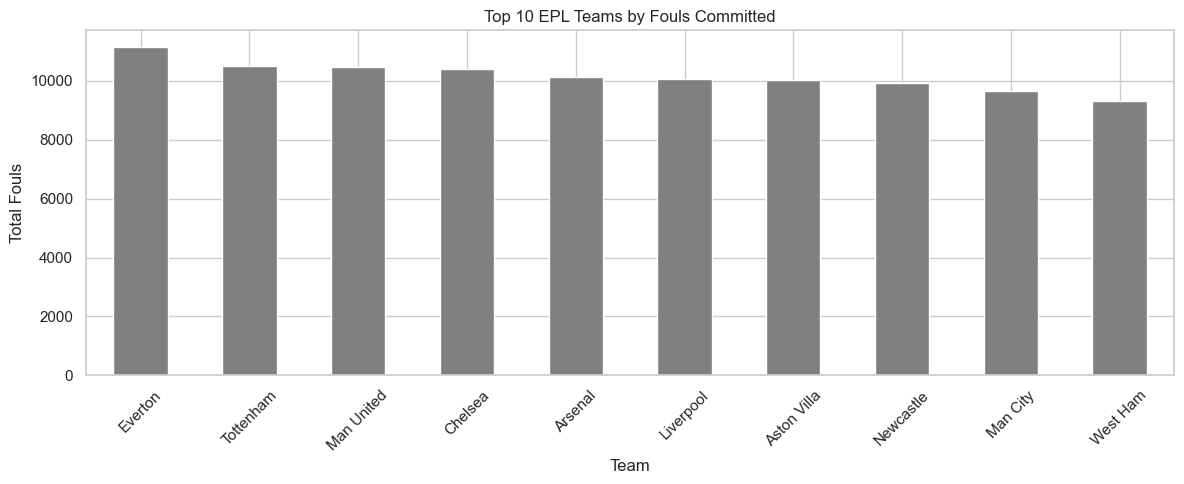

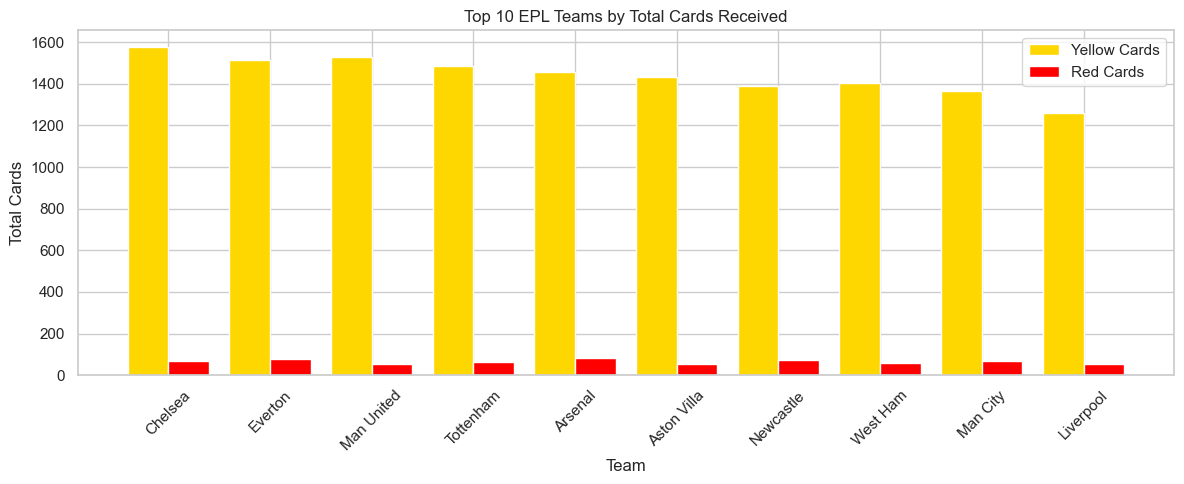

In [31]:
# --- Plot 1: Top 10 Teams by Fouls ---
top_10_fouls = discipline_stats.sort_values("Fouls", ascending=False).head(10)
plt.figure(figsize=(12, 5))
top_10_fouls["Fouls"].plot(kind="bar", color="gray")
plt.title("Top 10 EPL Teams by Fouls Committed")
plt.ylabel("Total Fouls")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Plot 2: Top 10 Teams by Total Cards (Yellow + Red) ---
discipline_stats["TotalCards"] = discipline_stats["YellowCards"] + discipline_stats["RedCards"]
top_10_cards = discipline_stats.sort_values("TotalCards", ascending=False).head(10)

plt.figure(figsize=(12, 5))
bar_width = 0.4
teams = top_10_cards.index
x = range(len(teams))

plt.bar(x, top_10_cards["YellowCards"], width=bar_width, label="Yellow Cards", color="gold")
plt.bar([i + bar_width for i in x], top_10_cards["RedCards"], width=bar_width, label="Red Cards", color="red")

plt.xticks([i + bar_width / 2 for i in x], teams, rotation=45)
plt.title("Top 10 EPL Teams by Total Cards Received")
plt.ylabel("Total Cards")
plt.xlabel("Team")
plt.legend()
plt.tight_layout()
plt.show()

### ✅ Key Findings: Most Aggressive or Undisciplined Teams

- **Top 3 teams by total fouls committed:**
  - **Everton**
  - **Tottenham**
  - **Manchester United**


- **Top 3 teams by total cards (yellow + red):**
  - **Chelsea**
  - **Everton**
  - **Manchester United**

## Question 5: How Reliable Is a Halftime Lead?

This analysis explores whether a team that is **leading at halftime** can be expected to win the match, and how often that lead is lost.

We also assess how unpredictable drawn matches are at the halfway point — to support live match strategy, betting odds models, and tactical decisions.

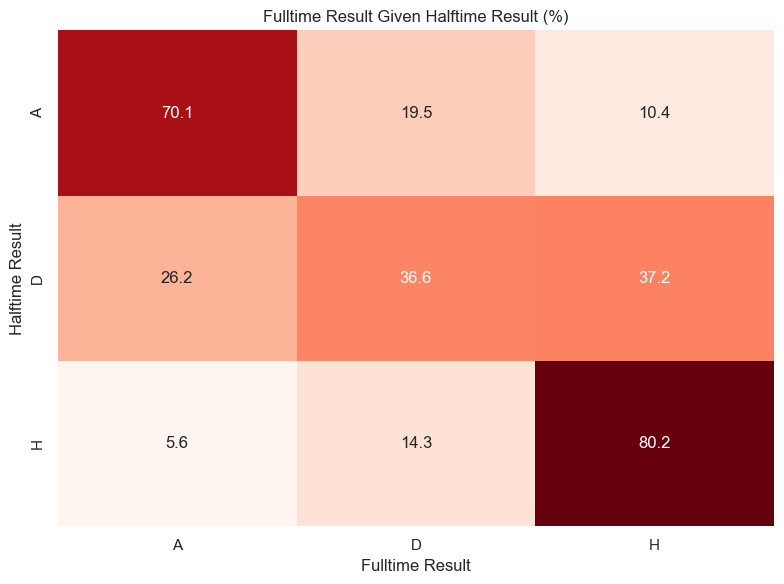

In [36]:
# Create cross-tab of halftime vs. fulltime result
ht_vs_ft = pd.crosstab(df_copy["HalfTimeResult"], df_copy["FullTimeResult"], normalize='index') * 100
ht_vs_ft = ht_vs_ft.round(1)

plt.figure(figsize=(8, 6))
sns.heatmap(ht_vs_ft, annot=True, fmt=".1f", cmap="Reds", cbar=False)
plt.title("Fulltime Result Given Halftime Result (%)")
plt.ylabel("Halftime Result")
plt.xlabel("Fulltime Result")
plt.tight_layout()
plt.show()

### ✅ Key Findings: Reliability of a Halftime Lead

- When a team is **leading at halftime (H)**:
  - They go on to **win 80.2%** of the time
  - Only **5.6%** of the time do they lose the match — showing that comebacks are rare

- When **losing at halftime (A)**:
  - Teams only manage a comeback win in **10.4%** of cases
  - They still go on to lose **70.1%** of the time

- When the match is **drawn at halftime (D)**:
  - Final outcomes are unpredictable:
    - 37.2% become a **home win**
    - 36.6% stay as a **draw**
    - 26.2% end in an **away win**

📌 **Insight:**  A halftime lead is a **strong predictor** of fulltime victory — in 4 out of 5 cases, it holds.  
Meanwhile, drawn matches represent the **most uncertain scenarios**, with nearly equal probability of any result.

## 🏁 Final Summary: EPL Match Insights

This exploratory analysis of the English Premier League (EPL) dataset revealed several actionable insights relevant for analysts, betting strategists, and football enthusiasts:

---

### 🔑 Key Insights Recap:

- **Home Advantage Is Real:**  
  Top teams like **Manchester United, Arsenal, and Liverpool** not only win more at home but also score more goals, confirming strong home dominance.

- **Scoring Trends Are Rising:**  
  Over recent seasons, the **average goals per match** have gradually increased — with a notable spike in 2023–24 — suggesting a more attacking league.

- **Shots on Target Matter Most:**  
  Among all match stats, **shots on target** (both for and against) showed the **strongest correlation** with match outcomes — more than fouls, cards, or corners.

- **Discipline Varies by Team:**  
  Teams like **Everton and Man United** commit the most fouls and receive high card counts, while **Chelsea** stands out for receiving many cards despite fewer fouls — suggesting tactical fouling.

- **Halftime Leads Are Highly Reliable:**  
  A team leading at halftime goes on to win **over 80%** of the time, while drawn matches are much harder to predict.

---

📌 **Conclusion:**  
This project demonstrates how match statistics can be translated into practical football insights — supporting smarter decisions in **coaching, betting, performance analysis**, and **fan engagement**.